<a href="https://colab.research.google.com/github/abhishek-dangol/Titanic_Kaggle/blob/master/Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the dependencies


In [0]:
import numpy as np                                ##perform numerical operation
import pandas as pd                               ## to mainpulate data
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#To upload the files


In [6]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


#Reading the data set into pandas Dataframe


In [7]:
import io

titanic_df = pd.read_csv("train.csv")

titanic_df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


#Size of the Dataset

In [8]:
titanic_df.shape

(891, 12)

#Overview of the dataset


In [9]:
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Here we can see that for the Cabin feature, most of the values (about 70%) are missing; hence, we can remove this feature

#Handle the missing data



1.   Delete the Cabin feature as mentioned above
2.   Embarked feature has only three missing values. Since this is a categorical variable, we can replace missing data with mode value, or in other words, we can fill the missing values with the most common embarkment value.




Text(0, 0.5, 'Frequency')

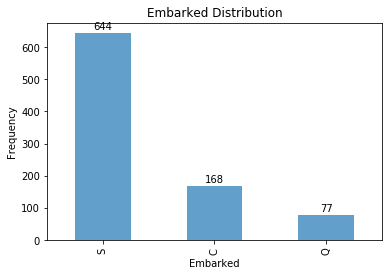

In [10]:
ax = titanic_df['Embarked'].value_counts().plot(kind='bar', alpha = 0.7)
rects = ax.patches
labels = ["%d" % i for i in range(len(rects))]
for rect, label in zip(rects, labels):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, height + 5, height, ha='center', va='bottom')
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Frequency')

We can see that most of the Embarked values belong to S, hence, we can assign the missing values as belonging to S.

In [0]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

Now, we need to focus on the Age feature which has 177 missing values. We can prdeict the missing values using machine learning algorithms. Before predicting, we need to explore thte data to check what other features will help us to predict the age.

# Data Preparation
## Deep dive into data therough exploratory data analysis
### Data Visualization

Text(0, 0.5, 'Normalized Count')

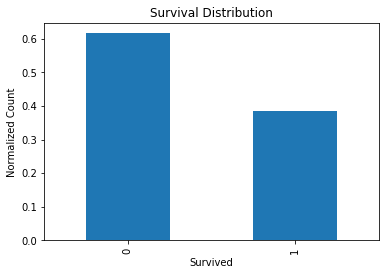

In [13]:
titanic_df['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Normalized Count')

The chances of dying on the Titanic was 60 percent!

Text(0, 0.5, 'Normalized Count')

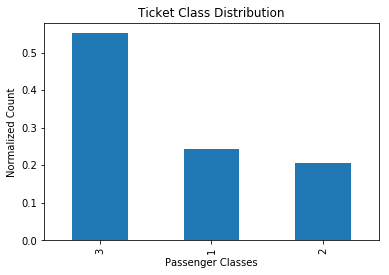

In [14]:
titanic_df['Pclass'].value_counts(normalize=True).plot(kind='bar')
plt.title('Ticket Class Distribution')
plt.xlabel('Passenger Classes')
plt.ylabel('Normalized Count')

More than 55 percent of the passengers belonged to the 3rd class

Text(0, 0.5, 'Normalized Count')

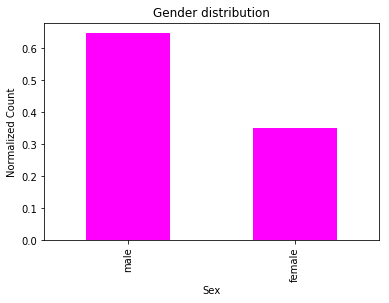

In [15]:
titanic_df['Sex'].value_counts(normalize=True).plot(kind='bar', color='magenta')
plt.title("Gender distribution")
plt.xlabel('Sex')
plt.ylabel('Normalized Count')

Almost 65 percent of the pasengers were men.

Text(0, 0.5, 'Normalized Count')

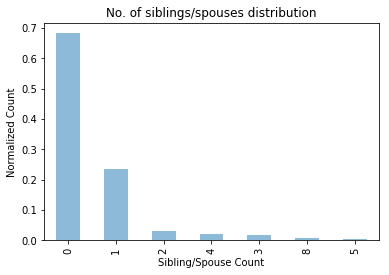

In [16]:
titanic_df['SibSp'].value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title("No. of siblings/spouses distribution")
plt.xlabel('Sibling/Spouse Count')
plt.ylabel('Normalized Count')

Almost 70 percent of the passengers were travelling alone.

Text(0, 0.5, 'Normalized Count')

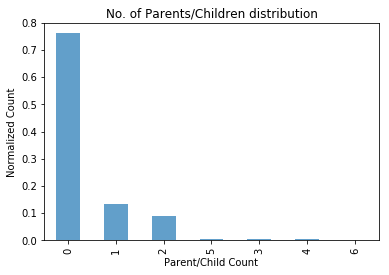

In [17]:
titanic_df['Parch'].value_counts(normalize=True).plot(kind='bar', alpha = 0.7)
plt.title("No. of Parents/Children distribution")
plt.xlabel("Parent/Child Count")
plt.ylabel("Normalized Count")

Around 75 percent of the passengers did not have a parent or a child with them.

Text(0, 0.5, 'Frequency')

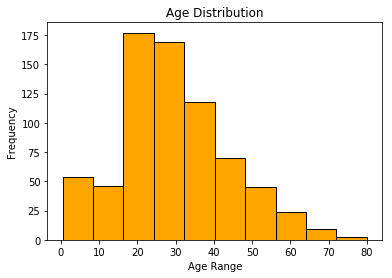

In [18]:
titanic_df['Age'].plot(kind='hist', color='orange', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Frequency')

Since age is a continuous variable, we used a histogram for this purpose. It looks like most passengers were between 18-30 years old. 

Text(0, 0.5, 'Frequency')

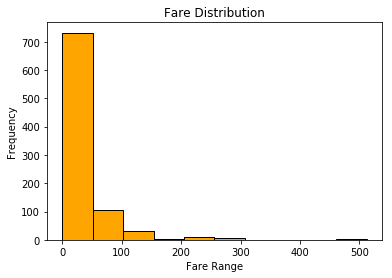

In [19]:
titanic_df['Fare'].plot(kind='hist', color='orange', edgecolor='black')
plt.title('Fare Distribution')
plt.xlabel('Fare Range')
plt.ylabel('Frequency')

Most tickets sold were within the range of 0-50.


##Now we analyze how the age variable depends on other features

Text(0.5, 1.0, 'Age vs Female vs Class 3')

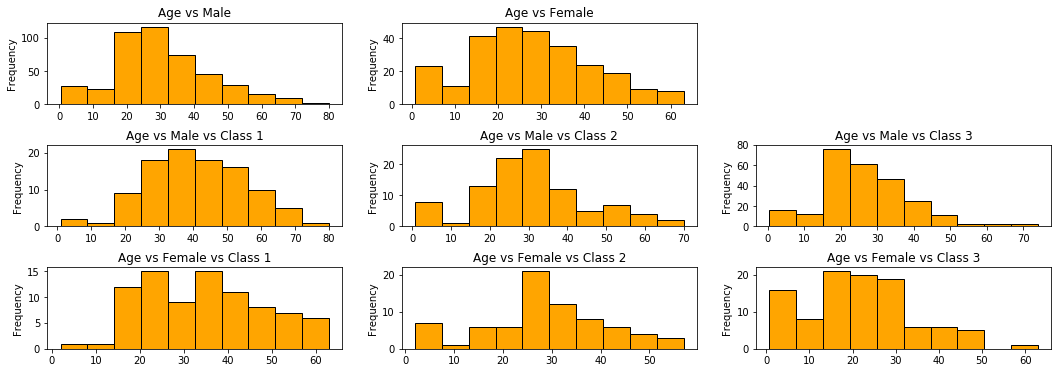

In [0]:
fig = plt.figure(figsize=(18, 6))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0))
titanic_df['Age'][(titanic_df["Sex"]=='male')].plot(kind='hist', color='orange', edgecolor='black')
plt.title('Age vs Male')
plt.subplot2grid((3,3), (0,1))
titanic_df['Age'][(titanic_df["Sex"]=='female')].plot(kind='hist',  color='orange', edgecolor='black')
plt.title('Age vs Female')
plt.subplot2grid((3,3), (1,0))
titanic_df['Age'][(titanic_df["Sex"]=='male') & (titanic_df['Pclass']==1)].plot(kind='hist',  color='orange', edgecolor='black')
plt.title('Age vs Male vs Class 1')
plt.subplot2grid((3,3), (1,1))
titanic_df['Age'][(titanic_df["Sex"]=='male') & (titanic_df['Pclass']==2)].plot(kind='hist',  color='orange', edgecolor='black')
plt.title('Age vs Male vs Class 2')
plt.subplot2grid((3,3), (1,2))
titanic_df['Age'][(titanic_df["Sex"]=='male') & (titanic_df['Pclass']==3)].plot(kind='hist',  color='orange', edgecolor='black')
plt.title('Age vs Male vs Class 3')
plt.subplot2grid((3,3), (2,0))
titanic_df['Age'][(titanic_df["Sex"]=='female') & (titanic_df['Pclass']==1)].plot(kind='hist',  color='orange', edgecolor='black')
plt.title('Age vs Female vs Class 1')
plt.subplot2grid((3,3), (2,1))
titanic_df['Age'][(titanic_df["Sex"]=='female') & (titanic_df['Pclass']==2)].plot(kind='hist',  color='orange', edgecolor='black')
plt.title('Age vs Female vs Class 2')
plt.subplot2grid((3,3), (2,2))
titanic_df['Age'][(titanic_df["Sex"]=='female') & (titanic_df['Pclass']==3)].plot(kind='hist', color='orange', edgecolor='black')
plt.title('Age vs Female vs Class 3')



        


The age distribution varies not only with gender but also the passenger class.

We are going to calculate the median age of passengers who are grouped by ticket calss and sex, and assign those median age values to the null values present in those corresponding groups.


In [0]:
titanic_df['Age'] = titanic_df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
titanic_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      25.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     30.0
18     31.0
19     21.5
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     25.0
27     19.0
28     21.5
29     25.0
       ... 
861    21.0
862    48.0
863    21.5
864    24.0
865    42.0
866    27.0
867    31.0
868    25.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    25.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    21.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

Before, the age for Passenger in row 5 was missing, but now the age has been assigned as 25.

Now, let us compare the survival rates between males and females

Text(0, 0.5, 'Survived Frequency (Normalized)')

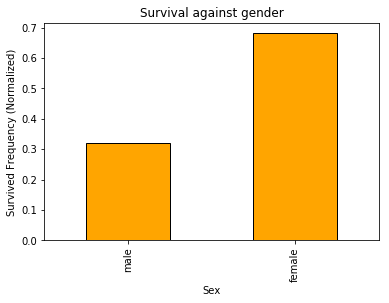

In [0]:
titanic_df['Sex'][titanic_df['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Survival against gender')
plt.xlabel('Sex')
plt.ylabel('Survived Frequency (Normalized)')

As we can see, females had almost 70 percent chance of survival whereas the men poor males had only 30 percent chance of survival.

Text(0.5, 1.0, 'TIcket Class vs Survival')

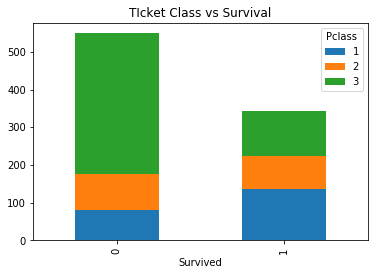

In [0]:
titanic_df.groupby(['Survived', 'Pclass']).size().unstack().plot(kind='bar', stacked=True)
plt.title('TIcket Class vs Survival')

The poor folks in the third class had a higher death count than the ones in first of second class. The survival count was highest for the 1st class passengers, followed by the third class and then the second class. This could be because not many people were staying in the second class.

Text(0, 0.5, 'Count')

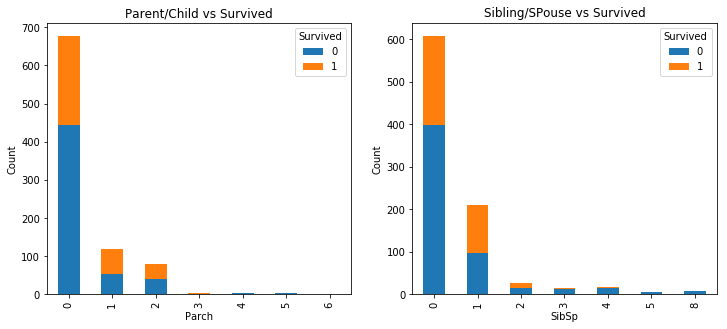

In [0]:
fig = plt.figure(figsize=(12,5))
plt.subplots_adjust(hspace=0.5)

ax=plt.subplot2grid((1,2), (0,0))
titanic_df.groupby(['Parch', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Parent/Child vs Survived')
plt.ylabel('Count')

ax=plt.subplot2grid((1,2), (0,1))
titanic_df.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Sibling/SPouse vs Survived')
plt.ylabel('Count')



These two bar charts show that if a passenger was accompanied by either spouse/sibling or parent/child, their odds of surviving was much higher than if they were on board the ship by themselves.

#Feature Engineering

Previously, we have seen that both features SibSp and Parch have similar influence on survival. Let us calculate if the passenger travelled alone or with their family members. Instead of two separate features, we can combine a new feature called FamilySize

In [0]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

Text(0.5, 1.0, 'Family vs Survival')

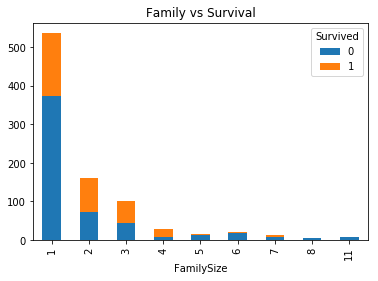

In [21]:
titanic_df.groupby(['FamilySize', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Family vs Survival')

If the passenger was with family members, their odds of survival were better.
Now let us have a look at the modified dataset

In [22]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
FamilySize     891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Now, let us look at the test data to see if they have any missing values.


In [23]:
test = pd.read_csv('test.csv')

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Age , Fare and Cabin have missing values. Let us ignore Cabin as we are not going to use that feature. WE have to fill the missing values with the median of existing values. Also, we will be adding 'FamilySIze', the new feature introduced as part of our feature engineering.

In [0]:
test['Age'] = test.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test['Fare'] = test['Fare'].fillna(test['Fare'].dropna().median())
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
                                                               

The test dataset now looks as follows:

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
FamilySize     418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


As PassengerId, Name, Ticket will not help t predict whether the passengers survuved or not, we will be dropping these features along with the Cabin. Also, we have already merged the SibSp and Parch into FamilySize, hence, we will not be using these two features as well. 
we have to apply hot encoding for categorical variables like Sex, Embarked and Pclass. Let us create X_train and X_test

In [0]:
X_train = titanic_df[['Pclass','Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
X_test = test[['Pclass','Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
labels_to_encode = ['Pclass', 'Sex', 'Embarked']
for label in labels_to_encode:
    X_train = X_train.join(pd.get_dummies(X_train[label], prefix = label))
    X_train.drop(label, axis=1, inplace=True)
for label in labels_to_encode:
    X_test = X_test.join(pd.get_dummies(X_test[label], prefix = label))
    X_test.drop(label, axis=1, inplace=True)
y = titanic_df['Survived'].values

Now, X_train looks like as follows

In [0]:
X_train.head()
X_train.fillna(-99999, inplace=True)

#Training the model

#We will use the Random Forest Classifier

In [28]:

rfclr = RandomForestClassifier(n_estimators=100, max_depth = 7)
scores = cross_val_score(rfclr, X_train, y, cv=5)
print(round(np.mean(scores*100)))
rfclr.fit(X_train, y)
predictions_rf = rfclr.predict(X_test)
submission_rf = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions_rf
})
submission_rf.to_csv('titanic_dt.csv', index=False)

82.0


In [29]:
titanic_submission = pd.read_csv('titanic_dt.csv')
titanic_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


#This gave us an accuracy of 82 percent

In [0]:
from google.colab import files
files.download('titanic_dt.csv')

In order to download the csv file for Kaggle use the above code and it should download it to your machine.